<a href="https://colab.research.google.com/github/Tiara-la/stacking-p2p-lending/blob/main/Stack_xgb_prosper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


# **Kaggle**

In [ ]:
# install the Kaggle API client
! pip install -q kaggle

In [ ]:
# Unggah file kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiaralailatulnikmah","key":"1a294e2d607cef4fb50b5cd7366998e0"}'}

In [ ]:
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d skihikingkevin/online-p2p-lending

In [ ]:
# melakukan unzip pada dataset yang telah di download
import zipfile,os
local_zip = '/content/online-p2p-lending.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/tmp/Master_Loan_Summary.csv',  delimiter=',')
df

# **Data Collection**

In [ ]:
df = df[df['data_source'] == 'Prosper']
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
1961527,80355,5000.0,36,0.2566,200.548615,E,2013-01-04,NaN,0.00,5000.00,1793.31,0.0,0.0,2015-07-04,2016-01-04,0,COMPLETED,Prosper
1961528,80708,15500.0,36,0.1679,550.998674,C,2013-01-04,NaN,0.00,15500.00,3452.00,0.0,0.0,2015-06-04,2016-01-04,0,COMPLETED,Prosper
1961529,80800,10000.0,60,0.2557,296.864320,E,2013-01-07,NaN,0.00,10000.00,4084.82,0.0,0.0,2015-09-07,2018-01-07,0,COMPLETED,Prosper
1961530,81062,15000.0,60,0.1752,376.995481,C,2013-01-07,NaN,0.00,15000.00,4133.78,0.0,0.0,2015-10-07,2018-01-07,0,COMPLETED,Prosper
1961531,80676,2500.0,36,0.0789,78.214113,A,2013-01-07,NaN,0.00,2499.99,228.74,0.0,0.0,2015-04-07,2016-01-07,0,COMPLETED,Prosper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875141,1081905,10000.0,36,0.0934,319.582092,B,2018-06-29,NaN,9667.17,332.83,86.75,0.0,0.0,2018-09-29,2018-08-29,0,CURRENT,Prosper
2875142,1081908,10000.0,36,0.1214,332.812163,C,2018-06-29,NaN,9766.97,233.03,99.78,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper
2875143,1081947,4000.0,60,0.2455,116.352367,E,2018-06-29,NaN,3964.36,35.64,80.71,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper
2875144,1081797,30000.0,60,0.1878,774.589469,D,2018-06-29,NaN,29688.48,311.52,463.07,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper


In [ ]:
df = df.reset_index(drop=True)
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,80355,5000.0,36,0.2566,200.548615,E,2013-01-04,NaN,0.00,5000.00,1793.31,0.0,0.0,2015-07-04,2016-01-04,0,COMPLETED,Prosper
1,80708,15500.0,36,0.1679,550.998674,C,2013-01-04,NaN,0.00,15500.00,3452.00,0.0,0.0,2015-06-04,2016-01-04,0,COMPLETED,Prosper
2,80800,10000.0,60,0.2557,296.864320,E,2013-01-07,NaN,0.00,10000.00,4084.82,0.0,0.0,2015-09-07,2018-01-07,0,COMPLETED,Prosper
3,81062,15000.0,60,0.1752,376.995481,C,2013-01-07,NaN,0.00,15000.00,4133.78,0.0,0.0,2015-10-07,2018-01-07,0,COMPLETED,Prosper
4,80676,2500.0,36,0.0789,78.214113,A,2013-01-07,NaN,0.00,2499.99,228.74,0.0,0.0,2015-04-07,2016-01-07,0,COMPLETED,Prosper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913614,1081905,10000.0,36,0.0934,319.582092,B,2018-06-29,NaN,9667.17,332.83,86.75,0.0,0.0,2018-09-29,2018-08-29,0,CURRENT,Prosper
913615,1081908,10000.0,36,0.1214,332.812163,C,2018-06-29,NaN,9766.97,233.03,99.78,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper
913616,1081947,4000.0,60,0.2455,116.352367,E,2018-06-29,NaN,3964.36,35.64,80.71,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper
913617,1081797,30000.0,60,0.1878,774.589469,D,2018-06-29,NaN,29688.48,311.52,463.07,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper


In [ ]:
df.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due
count,9.136190e+05,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.0,913619.000000
mean,5.821678e+05,13332.617882,43.128871,0.153106,407.563923,4307.853990,8104.099338,2142.619795,5.808205,0.0,15.807546
std,2.858683e+05,7946.272924,10.982495,0.065643,235.237354,6514.352055,7514.961075,2073.576736,34.922043,0.0,109.942776
min,7.965000e+04,2000.000000,12.000000,0.053100,40.066394,0.000000,-15.000000,-8.255100,0.000000,0.0,0.000000
25%,3.309195e+05,7500.000000,36.000000,0.103900,231.905584,0.000000,2198.805000,702.335000,0.000000,0.0,0.000000
50%,5.946240e+05,12000.000000,36.000000,0.137500,361.373478,0.000000,5722.420000,1497.500000,0.000000,0.0,0.000000
75%,8.324515e+05,18000.000000,60.000000,0.192000,531.325392,7162.990000,12000.000000,2875.450000,0.000000,0.0,0.000000
max,1.081986e+06,40000.000000,60.000000,0.319200,2251.506148,39546.430000,40000.000000,18575.600000,1676.850000,0.0,2029.000000


In [ ]:
df['loan_status_description'].unique()

array(['COMPLETED', 'DEFAULTED', 'CURRENT', 'CHARGEOFF', 'CANCELLED'],
      dtype=object)

In [ ]:
df["loan_status_description"].value_counts()

CURRENT      413209
COMPLETED    384217
DEFAULTED     94066
CHARGEOFF     19874
CANCELLED      2253
Name: loan_status_description, dtype: int64

In [ ]:
cleanup_nums = {"loan_status_description":     {"CURRENT": 0, "COMPLETED": 0, "DEFAULTED": 1, "CHARGEOFF": 1, "CANCELLED": 1}}

In [ ]:
df = df.replace(cleanup_nums)
df.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,80355,5000.0,36,0.2566,200.548615,E,2013-01-04,NaN,0.0,5000.00,1793.31,0.0,0.0,2015-07-04,2016-01-04,0,0,Prosper
1,80708,15500.0,36,0.1679,550.998674,C,2013-01-04,NaN,0.0,15500.00,3452.00,0.0,0.0,2015-06-04,2016-01-04,0,0,Prosper
2,80800,10000.0,60,0.2557,296.864320,E,2013-01-07,NaN,0.0,10000.00,4084.82,0.0,0.0,2015-09-07,2018-01-07,0,0,Prosper
3,81062,15000.0,60,0.1752,376.995481,C,2013-01-07,NaN,0.0,15000.00,4133.78,0.0,0.0,2015-10-07,2018-01-07,0,0,Prosper
4,80676,2500.0,36,0.0789,78.214113,A,2013-01-07,NaN,0.0,2499.99,228.74,0.0,0.0,2015-04-07,2016-01-07,0,0,Prosper


In [ ]:
df["loan_status_description"].value_counts()

0    797426
1    116193
Name: loan_status_description, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913619 entries, 0 to 913618
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_number                  913619 non-null  int64  
 1   amount_borrowed              913619 non-null  float64
 2   term                         913619 non-null  int64  
 3   borrower_rate                913619 non-null  float64
 4   installment                  913619 non-null  float64
 5   grade                        913619 non-null  object 
 6   origination_date             913619 non-null  object 
 7   listing_title                50541 non-null   object 
 8   principal_balance            913619 non-null  float64
 9   principal_paid               913619 non-null  float64
 10  interest_paid                913619 non-null  float64
 11  late_fees_paid               913619 non-null  float64
 12  debt_sale_proceeds_received  913619 non-null  float64
 13 

In [ ]:
#preprocessing data
#cek mising value
df.isnull().sum() 

loan_number                         0
amount_borrowed                     0
term                                0
borrower_rate                       0
installment                         0
grade                               0
origination_date                    0
listing_title                  863078
principal_balance                   0
principal_paid                      0
interest_paid                       0
late_fees_paid                      0
debt_sale_proceeds_received         0
last_payment_date                   0
next_payment_due_date               0
days_past_due                       0
loan_status_description             0
data_source                         0
dtype: int64

# **Preprocessing Data**

In [ ]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (913619, 18)


In [ ]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'listing_title': number of missing values '863078' ==> '94.468%'


In [ ]:
df = df.drop(['listing_title'], axis=1)

Tidak ada missing value, sehingga tidak perlu ada handling

In [ ]:
df.isna().sum()

loan_number                    0
amount_borrowed                0
term                           0
borrower_rate                  0
installment                    0
grade                          0
origination_date               0
principal_balance              0
principal_paid                 0
interest_paid                  0
late_fees_paid                 0
debt_sale_proceeds_received    0
last_payment_date              0
next_payment_due_date          0
days_past_due                  0
loan_status_description        0
data_source                    0
dtype: int64

In [ ]:
df = df.drop(['last_payment_date', 'next_payment_due_date', 'origination_date'], axis=1)
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due,loan_status_description,data_source
0,80355,5000.0,36,0.2566,200.548615,E,0.00,5000.00,1793.31,0.0,0.0,0,0,Prosper
1,80708,15500.0,36,0.1679,550.998674,C,0.00,15500.00,3452.00,0.0,0.0,0,0,Prosper
2,80800,10000.0,60,0.2557,296.864320,E,0.00,10000.00,4084.82,0.0,0.0,0,0,Prosper
3,81062,15000.0,60,0.1752,376.995481,C,0.00,15000.00,4133.78,0.0,0.0,0,0,Prosper
4,80676,2500.0,36,0.0789,78.214113,A,0.00,2499.99,228.74,0.0,0.0,0,0,Prosper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913614,1081905,10000.0,36,0.0934,319.582092,B,9667.17,332.83,86.75,0.0,0.0,0,0,Prosper
913615,1081908,10000.0,36,0.1214,332.812163,C,9766.97,233.03,99.78,0.0,0.0,0,0,Prosper
913616,1081947,4000.0,60,0.2455,116.352367,E,3964.36,35.64,80.71,0.0,0.0,0,0,Prosper
913617,1081797,30000.0,60,0.1878,774.589469,D,29688.48,311.52,463.07,0.0,0.0,0,0,Prosper


In [ ]:
df.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due,loan_status_description
count,9.136190e+05,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.000000,913619.0,913619.000000,913619.000000
mean,5.821678e+05,13332.617882,43.128871,0.153106,407.563923,4307.853990,8104.099338,2142.619795,5.808205,0.0,15.807546,0.127179
std,2.858683e+05,7946.272924,10.982495,0.065643,235.237354,6514.352055,7514.961075,2073.576736,34.922043,0.0,109.942776,0.333173
min,7.965000e+04,2000.000000,12.000000,0.053100,40.066394,0.000000,-15.000000,-8.255100,0.000000,0.0,0.000000,0.000000
25%,3.309195e+05,7500.000000,36.000000,0.103900,231.905584,0.000000,2198.805000,702.335000,0.000000,0.0,0.000000,0.000000
50%,5.946240e+05,12000.000000,36.000000,0.137500,361.373478,0.000000,5722.420000,1497.500000,0.000000,0.0,0.000000,0.000000
75%,8.324515e+05,18000.000000,60.000000,0.192000,531.325392,7162.990000,12000.000000,2875.450000,0.000000,0.0,0.000000,0.000000
max,1.081986e+06,40000.000000,60.000000,0.319200,2251.506148,39546.430000,40000.000000,18575.600000,1676.850000,0.0,2029.000000,1.000000


## **Data Cleaning: Outlier Check**

### **amount_borrowed**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


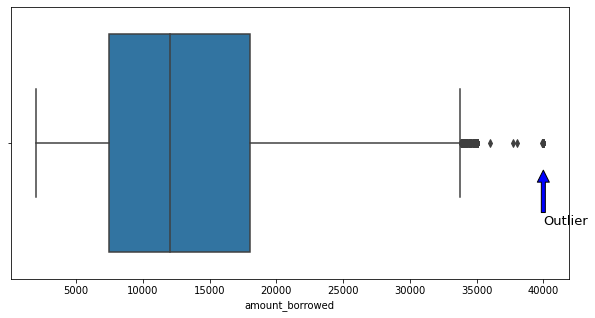

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['amount_borrowed'])
plt.annotate('Outlier', (df['amount_borrowed'].describe()['max'],0.1), xytext = (df['amount_borrowed'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['amount_borrowed'].describe()['75%'] - df['amount_borrowed'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['amount_borrowed'].quantile(0.25)
Q3 = df['amount_borrowed'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['amount_borrowed'] < (Q1-1.5*IQR)) | (df['amount_borrowed'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (883499, 14)


### **borrower_rate**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


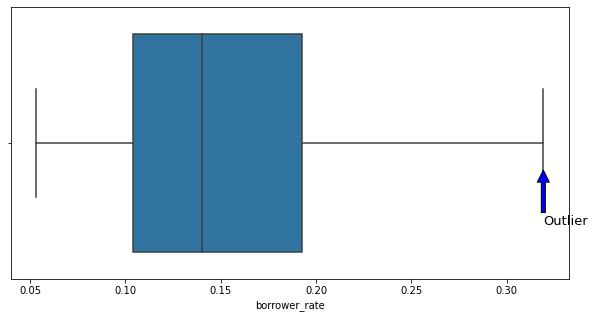

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['borrower_rate'])
plt.annotate('Outlier', (df['borrower_rate'].describe()['max'],0.1), xytext = (df['borrower_rate'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['borrower_rate'].describe()['75%'] - df['borrower_rate'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['borrower_rate'].quantile(0.25)
Q3 = df['borrower_rate'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['borrower_rate'] < (Q1-1.5*IQR)) | (df['borrower_rate'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (883499, 14)


### **installment**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


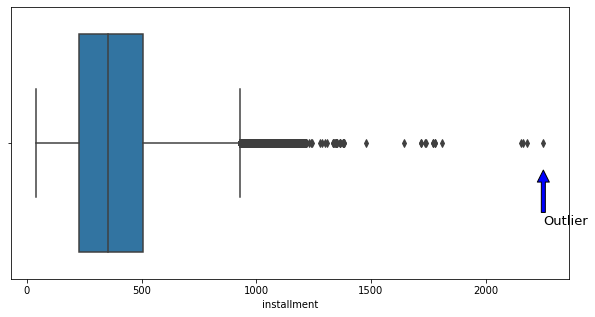

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['installment'])
plt.annotate('Outlier', (df['installment'].describe()['max'],0.1), xytext = (df['installment'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['installment'].describe()['75%'] - df['installment'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['installment'].quantile(0.25)
Q3 = df['installment'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['installment'] < (Q1-1.5*IQR)) | (df['installment'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (866490, 14)


### **principal_balance**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


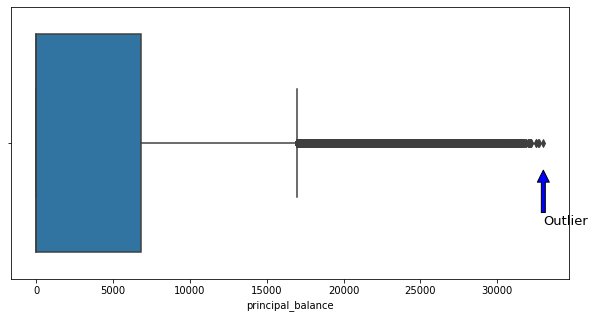

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['principal_balance'])
plt.annotate('Outlier', (df['principal_balance'].describe()['max'],0.1), xytext = (df['principal_balance'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['principal_balance'].describe()['75%'] - df['principal_balance'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['principal_balance'].quantile(0.25)
Q3 = df['principal_balance'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['principal_balance'] < (Q1-1.5*IQR)) | (df['principal_balance'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (830829, 14)


### **principal_paid**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


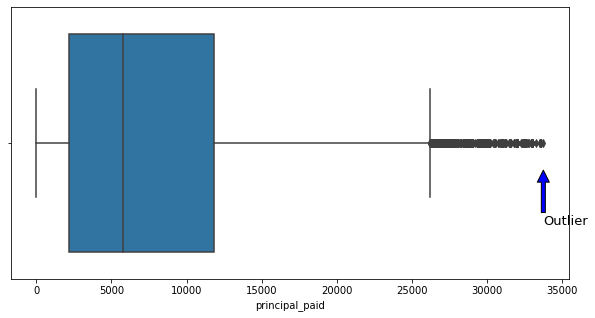

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['principal_paid'])
plt.annotate('Outlier', (df['principal_paid'].describe()['max'],0.1), xytext = (df['principal_paid'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['principal_paid'].describe()['75%'] - df['principal_paid'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['principal_paid'].quantile(0.25)
Q3 = df['principal_paid'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['principal_paid'] < (Q1-1.5*IQR)) | (df['principal_paid'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (824797, 14)


### **Interest_paid**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


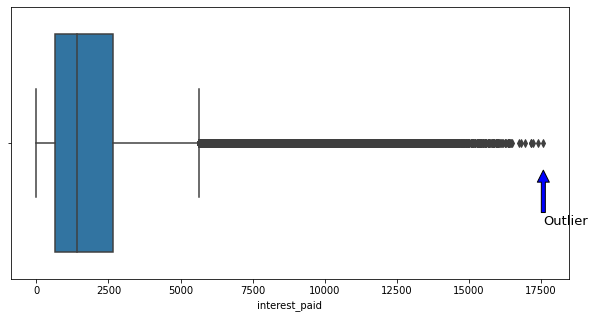

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['interest_paid'])
plt.annotate('Outlier', (df['interest_paid'].describe()['max'],0.1), xytext = (df['interest_paid'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['interest_paid'].describe()['75%'] - df['interest_paid'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['interest_paid'].quantile(0.25)
Q3 = df['interest_paid'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['interest_paid'] < (Q1-1.5*IQR)) | (df['interest_paid'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (779042, 14)


### **late_fees_paid**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


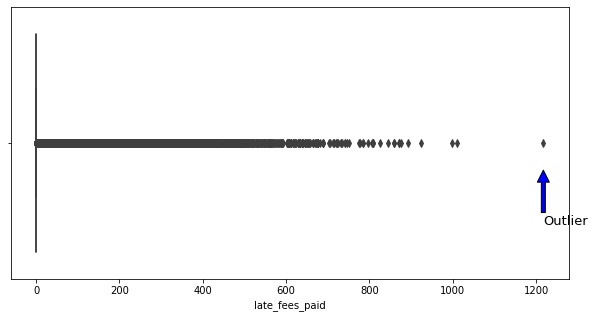

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['late_fees_paid'])
plt.annotate('Outlier', (df['late_fees_paid'].describe()['max'],0.1), xytext = (df['late_fees_paid'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['late_fees_paid'].describe()['75%'] - df['late_fees_paid'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['late_fees_paid'].quantile(0.25)
Q3 = df['late_fees_paid'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['late_fees_paid'] < (Q1-1.5*IQR)) | (df['late_fees_paid'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (727131, 14)


### **debt_sale_proceeds_received**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


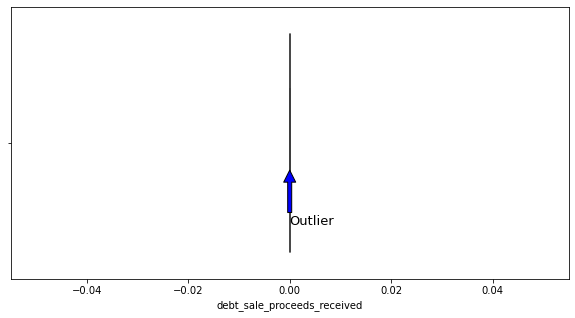

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['debt_sale_proceeds_received'])
plt.annotate('Outlier', (df['debt_sale_proceeds_received'].describe()['max'],0.1), xytext = (df['debt_sale_proceeds_received'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['debt_sale_proceeds_received'].describe()['75%'] - df['debt_sale_proceeds_received'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['debt_sale_proceeds_received'].quantile(0.25)
Q3 = df['debt_sale_proceeds_received'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['debt_sale_proceeds_received'] < (Q1-1.5*IQR)) | (df['debt_sale_proceeds_received'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (727131, 14)


### **term**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


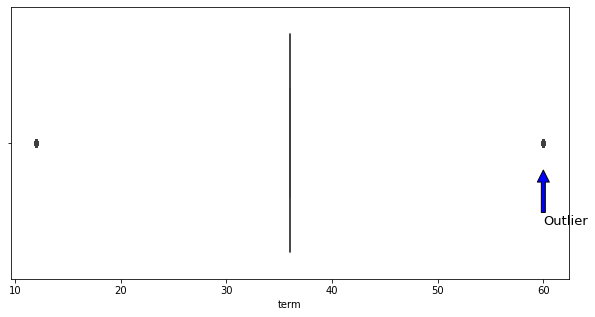

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['term'])
plt.annotate('Outlier', (df['term'].describe()['max'],0.1), xytext = (df['term'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['term'].describe()['75%'] - df['term'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['term'].quantile(0.25)
Q3 = df['term'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['term'] < (Q1-1.5*IQR)) | (df['term'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (549838, 14)


### **days_past_due**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


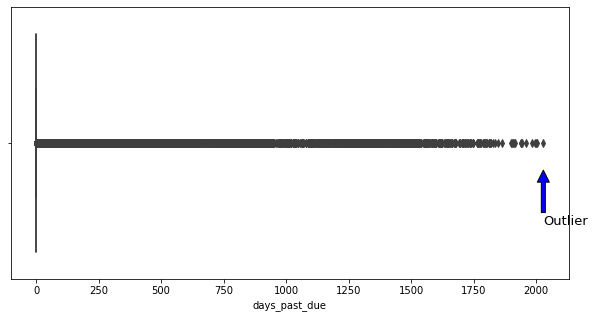

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['days_past_due'])
plt.annotate('Outlier', (df['days_past_due'].describe()['max'],0.1), xytext = (df['days_past_due'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['days_past_due'].describe()['75%'] - df['days_past_due'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['days_past_due'].quantile(0.25)
Q3 = df['days_past_due'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['days_past_due'] < (Q1-1.5*IQR)) | (df['days_past_due'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

Shape akhir:  (525401, 14)


# **Exploratory Data Analysis**

In [ ]:
df.info()

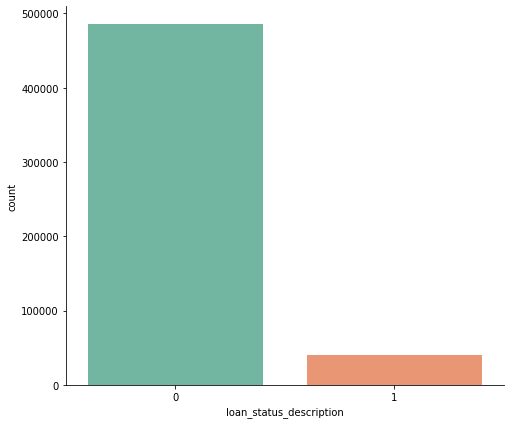

In [ ]:
sns.catplot(kind='count',x='loan_status_description',height=6, aspect=1.2,data=df,palette='Set2')
plt.show()

In [ ]:
df["loan_status_description"].value_counts(dropna= False)

0    485287
1     40114
Name: loan_status_description, dtype: int64

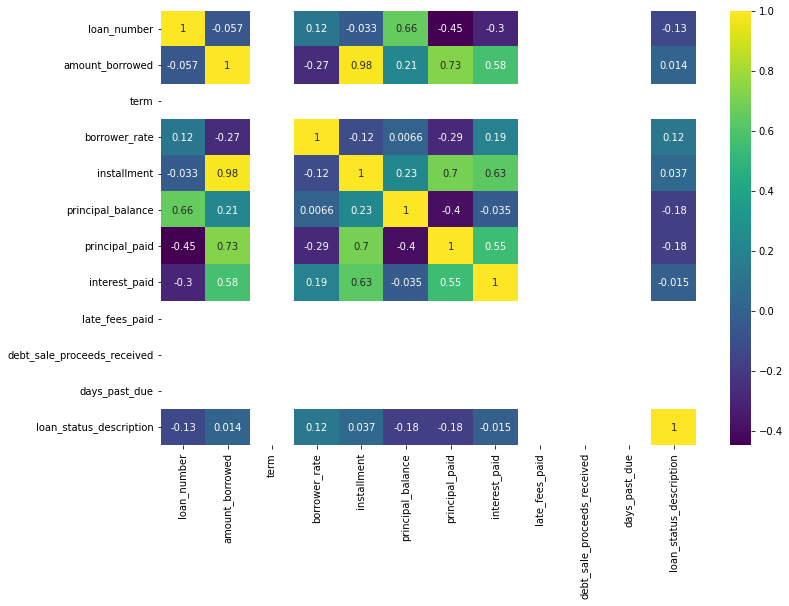

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

loan_status_description memiliki korelasi baik dengan days_past_due; installment dengan principal_paid; amount_borrowed dengan principal_paid dan interest_paid; installment dengan principal_paid

In [ ]:
df.describe()

,loan_number,amount_borrowed,term,borrower_rate,installment,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due,loan_status_description
count,5.254010e+05,525401.000000,525401.0,525401.000000,525401.000000,525401.000000,525401.000000,525401.000000,525401.0,525401.0,525401.0,525401.000000
mean,5.897548e+05,10601.919881,36.0,0.144752,360.433992,2518.595101,7508.981161,1388.996000,0.0,0.0,0.0,0.076349
std,2.833194e+05,5733.522635,0.0,0.069398,189.490614,4015.251832,6167.601353,1110.021287,0.0,0.0,0.0,0.265556
min,7.965600e+04,2000.000000,36.0,0.053100,60.220557,0.000000,0.000000,-7.047900,0.0,0.0,0.0,0.000000
25%,3.407800e+05,6000.000000,36.0,0.093500,199.974331,0.000000,2375.470000,533.364500,0.0,0.0,0.0,0.000000
50%,6.084400e+05,10000.000000,36.0,0.124900,333.625664,0.000000,5856.500000,1103.950000,0.0,0.0,0.0,0.000000
75%,8.346790e+05,15000.000000,36.0,0.181500,489.838205,4135.790000,11053.080000,1954.680000,0.0,0.0,0.0,0.000000
max,1.081983e+06,30000.000000,36.0,0.319200,930.746374,16986.350000,26215.920000,5623.950000,0.0,0.0,0.0,1.000000


In [ ]:
# df['listing_title'].value_counts()

KeyError: ignored

In [ ]:
# df['listing_title'].dtype

In [ ]:
# df['installment'].value_counts()

In [ ]:
# plt.figure(figsize=(50, 10))

# plt.subplot(2, 2, 1)
# uniq = df['listing_title'].astype(str).unique()
# grade = sorted(uniq.tolist())
# sns.countplot(x='listing_title', data=df, hue='loan_status_description', order=grade)

### **income**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['income'])
plt.annotate('Outlier', (df['income'].describe()['max'],0.1), xytext = (df['income'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['income'].describe()['75%'] - df['income'].describe()['25%']

KeyError: ignored

<Figure size 720x360 with 0 Axes>

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

KeyError: ignored

In [ ]:
# Removing outliers
df = df[~((df['income'] < (Q1-1.5*IQR)) | (df['income'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

### **outcome**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.boxplot(df['tm_encode_3'])
plt.annotate('Outlier', (df['tm_encode_3'].describe()['max'],0.1), xytext = (df['tm_encode_3'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['tm_encode_3'].describe()['75%'] - df['tm_encode_3'].describe()['25%']

In [ ]:
# Q1, Q3, dan IQR
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df['income'] < (Q1-1.5*IQR)) | (df['income'] > (Q3+1.5*IQR)))]

In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', df.shape)

# **Encoder**

In [ ]:
label_encode = ['grade']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder()
# Encode labels in column 'grade'. 

df[label_encode] =df[label_encode].apply(LabelEncoder().fit_transform)

In [ ]:
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due,loan_status_description,data_source
0,80355,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1793.31,0.0,0.0,0,0,Prosper
1,80708,15500.00,36,0.1679,550.998674,2,0.00,15500.00,3452.00,0.0,0.0,0,0,Prosper
4,80676,2500.00,36,0.0789,78.214113,0,0.00,2499.99,228.74,0.0,0.0,0,0,Prosper
5,82158,3983.31,36,0.2859,166.036273,5,0.00,3983.30,1582.13,0.0,0.0,0,0,Prosper
6,81659,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1598.26,0.0,0.0,0,0,Prosper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913611,1081977,11400.00,36,0.0964,365.922141,1,11124.41,275.59,90.33,0.0,0.0,0,0,Prosper
913612,1081968,9800.00,36,0.0531,295.080729,0,9547.69,252.31,42.77,0.0,0.0,0,0,Prosper
913614,1081905,10000.00,36,0.0934,319.582092,1,9667.17,332.83,86.75,0.0,0.0,0,0,Prosper
913615,1081908,10000.00,36,0.1214,332.812163,2,9766.97,233.03,99.78,0.0,0.0,0,0,Prosper


In [ ]:
df = df.drop(['data_source'], axis=1)
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due,loan_status_description
0,80355,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1793.31,0.0,0.0,0,0
1,80708,15500.00,36,0.1679,550.998674,2,0.00,15500.00,3452.00,0.0,0.0,0,0
4,80676,2500.00,36,0.0789,78.214113,0,0.00,2499.99,228.74,0.0,0.0,0,0
5,82158,3983.31,36,0.2859,166.036273,5,0.00,3983.30,1582.13,0.0,0.0,0,0
6,81659,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1598.26,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913611,1081977,11400.00,36,0.0964,365.922141,1,11124.41,275.59,90.33,0.0,0.0,0,0
913612,1081968,9800.00,36,0.0531,295.080729,0,9547.69,252.31,42.77,0.0,0.0,0,0
913614,1081905,10000.00,36,0.0934,319.582092,1,9667.17,332.83,86.75,0.0,0.0,0,0
913615,1081908,10000.00,36,0.1214,332.812163,2,9766.97,233.03,99.78,0.0,0.0,0,0


In [ ]:
df = df.reset_index(drop=True)
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due,loan_status_description
0,80355,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1793.31,0.0,0.0,0,0
1,80708,15500.00,36,0.1679,550.998674,2,0.00,15500.00,3452.00,0.0,0.0,0,0
2,80676,2500.00,36,0.0789,78.214113,0,0.00,2499.99,228.74,0.0,0.0,0,0
3,82158,3983.31,36,0.2859,166.036273,5,0.00,3983.30,1582.13,0.0,0.0,0,0
4,81659,5000.00,36,0.2566,200.548615,4,0.00,5000.00,1598.26,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525396,1081977,11400.00,36,0.0964,365.922141,1,11124.41,275.59,90.33,0.0,0.0,0,0
525397,1081968,9800.00,36,0.0531,295.080729,0,9547.69,252.31,42.77,0.0,0.0,0,0
525398,1081905,10000.00,36,0.0934,319.582092,1,9667.17,332.83,86.75,0.0,0.0,0,0
525399,1081908,10000.00,36,0.1214,332.812163,2,9766.97,233.03,99.78,0.0,0.0,0,0


# **SMOTE**

In [ ]:
#over sampling data SMOTE
loan_data = df
X = loan_data.drop(['loan_status_description'], axis=1)
y = loan_data['loan_status_description']

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)

loan_datas = X_sm
loan_datas['loan_status_description'] = y_sm

In [ ]:
# #over sampling data SMOTE
# from imblearn.under_sampling import NearMiss

# loan_data = df
# X = loan_data.drop(['label'], axis=1)
# y = loan_data['label']

# from imblearn.over_sampling import SMOTE
# undersample = NearMiss(version=1, n_neighbors=3)
# X_sm, y_sm =  undersample.fit_resample(X,y)

# loan_datas = X_sm
# loan_datas['label'] = y_sm

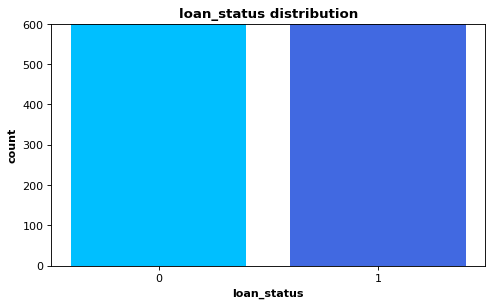

Data before over-sampling
0    485287
1     40114
Name: loan_status_description, dtype: int64 

Data after over-sampling
0    485287
1    485287
Name: loan_status_description, dtype: int64


In [ ]:
#melihat hasil dari Over Sampling SMOTE
import numpy as np
import matplotlib.pyplot as plt
height = y_sm.value_counts()
labels = ( '0', '1')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('loan_status distribution', fontweight='bold')
plt.xlabel('loan_status', fontweight='bold')
plt.ylabel('count', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

print("Data before over-sampling")
print(df['loan_status_description'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_datas['loan_status_description'].value_counts())

In [ ]:
# #split data, data test 20% atau 0.2, data training 80%
# from sklearn.model_selection import train_test_split
# X=df.drop("label",axis=1)
# y=df["label"]
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
final_data_std = loan_datas.drop(['loan_status_description', 
                          # 'sex', 'occupation', 'education', 'education', 'marriage', 'household'
                          ], axis=1)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# Scaled_data = ss.fit_transform(final_data_std)
# Scaled_data = pd.DataFrame(Scaled_data,columns=final_data_std.columns,index=df.index)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(final_data_std)
scaled_datas=model.transform(final_data_std)
Scaled_data = pd.DataFrame(scaled_datas,columns=final_data_std.columns,index=loan_datas.index)

In [ ]:
Scaled_data

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due
0,0.000697,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.319723,0.0,0.0,0.0
1,0.001050,0.482143,0.0,0.431417,0.563772,0.333333,0.0,0.591244,0.614287,0.0,0.0,0.0
2,0.001018,0.017857,0.0,0.096956,0.020670,0.000000,0.0,0.095362,0.041873,0.0,0.0,0.0
3,0.002496,0.070833,0.0,0.874859,0.121554,0.833333,0.0,0.151942,0.282220,0.0,0.0,0.0
4,0.001998,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.285084,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
970569,0.059967,0.148818,0.0,0.562485,0.197686,0.500000,0.0,0.067237,0.213520,0.0,0.0,0.0
970570,0.113643,0.078566,0.0,0.652483,0.116414,0.666667,0.0,0.020021,0.082648,0.0,0.0,0.0
970571,0.511206,0.464286,0.0,0.234458,0.499512,0.333333,0.0,0.076649,0.096165,0.0,0.0,0.0
970572,0.485466,0.394194,0.0,0.554535,0.487842,0.500000,0.0,0.030900,0.113960,0.0,0.0,0.0


In [ ]:
final_data_label = loan_datas[['loan_status_description', 
                      #  'sex', 'occupation', 'education', 'education', 'marriage', 'household'
                       ]]

In [ ]:
final_data_akhir=pd.merge(Scaled_data, final_data_label, left_index=True, right_index=True)

In [ ]:
final_data_akhir

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due,loan_status_description
0,0.000697,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.319723,0.0,0.0,0.0,0
1,0.001050,0.482143,0.0,0.431417,0.563772,0.333333,0.0,0.591244,0.614287,0.0,0.0,0.0,0
2,0.001018,0.017857,0.0,0.096956,0.020670,0.000000,0.0,0.095362,0.041873,0.0,0.0,0.0,0
3,0.002496,0.070833,0.0,0.874859,0.121554,0.833333,0.0,0.151942,0.282220,0.0,0.0,0.0,0
4,0.001998,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.285084,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970569,0.059967,0.148818,0.0,0.562485,0.197686,0.500000,0.0,0.067237,0.213520,0.0,0.0,0.0,1
970570,0.113643,0.078566,0.0,0.652483,0.116414,0.666667,0.0,0.020021,0.082648,0.0,0.0,0.0,1
970571,0.511206,0.464286,0.0,0.234458,0.499512,0.333333,0.0,0.076649,0.096165,0.0,0.0,0.0,1
970572,0.485466,0.394194,0.0,0.554535,0.487842,0.500000,0.0,0.030900,0.113960,0.0,0.0,0.0,1


# **XGBOOST**

In [ ]:
# Feature importance
from xgboost import XGBClassifier

#XGB model fit
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_model.feature_importances_

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':xgb_model.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
0,sex,0.128914
24,time,0.100790
10,prior_account,0.058175
9,tm_encode_3,0.051314
11,prior_repay,0.048211
23,loan_time,0.046645
2,education,0.043909
16,account,0.040402
20,cash_limit,0.034579
8,outcome_tm,0.034540


In [ ]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')

In [ ]:
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':feature_important})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

ValueError: ignored

In [ ]:
feature_important

{'sex': 46,
 'household': 13,
 'loan_time': 66,
 'cash_limit': 27,
 'time': 77,
 'yu_e_tm': 35,
 'tm_encode_3': 38,
 'education': 26,
 'account': 21,
 'prior_repay': 45,
 'prior_account': 40,
 'browse_data': 56,
 'consume_count': 29,
 'adjust_account': 12,
 'occupation': 3,
 'credit_limit': 29,
 'income': 17,
 'minimun_repay': 34,
 'outcome_tm': 11,
 'income_tm': 8,
 'account_balance': 14,
 'outcome': 7,
 'marriage': 9,
 'circulated_interest': 13,
 'yu_e': 3,
 'avaliable_balance': 2}

In [ ]:
final_data = loan_datas[['days_past_due', 'debt_sale_proceeds_received', 'principal_balance', 'late_fees_paid', 'principal_paid', 'loan_number', 'loan_status_description']]
final_data

# **Modelling**

In [ ]:
#import sklearn metric
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve)

In [ ]:
#confusion Metric
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
# #mengubah tyoe data dari integer ke float
# import numpy as np
# X_train = np.array(X_train).astype(np.float32)
# X_test = np.array(X_test).astype(np.float32)
# y_train = np.array(y_train).astype(np.float32)
# y_test = np.array(y_test).astype(np.float32)

## **KNN**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=100, leaf_size=30)

knn_clf.fit(X_train, y_train)

y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 87.11%
_________________
CLASSIFICATION REPORT:
                    0.0     1.0  accuracy     macro avg  weighted avg
precision      0.871054     0.0  0.871054      0.435527      0.758735
recall         1.000000     0.0  0.871054      0.500000      0.871054
f1-score       0.931084     0.0  0.871054      0.465542      0.811024
support    38741.000000  5735.0  0.871054  44476.000000  44476.000000
_________________
Confusion Matrix: 
 [[38741     0]
 [ 5735     0]]

Test Result:
Accuracy Score: 86.98%
_________________
CLASSIFICATION REPORT:
                   0.0     1.0  accuracy     macro avg  weighted avg
precision     0.869784     0.0  0.869784      0.434892      0.756525
recall        1.000000     0.0  0.869784      0.500000      0.869784
f1-score      0.930358     0.0  0.869784      0.465179      0.809211
support    9672.000000  1448.0  0.869784  11120.000000  11120.000000
_________________
Confusion Matrix: 
 [[9672    0]
 [1448    0]]



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

In [ ]:
from sklearn.model_selection import GridSearchCV
model1 = KNeighborsClassifier()
parameters = {
    'n_neighbors': [10, 100, 200], 
    'leaf_size' : [30, 50, 100]
}

grid_search = GridSearchCV(model1,parameters)
grid_search.fit(X,y)

print('param terbaik =', grid_search.best_params_)

param terbaik = {'leaf_size': 30, 'n_neighbors': 100}


## **DT**

In [ ]:
#decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_________________
CLASSIFICATION REPORT:
                0.0      1.0  accuracy  macro avg  weighted avg
precision       1.0      1.0       1.0        1.0           1.0
recall          1.0      1.0       1.0        1.0           1.0
f1-score        1.0      1.0       1.0        1.0           1.0
support    637831.0  93064.0       1.0   730895.0      730895.0
_________________
Confusion Matrix: 
 [[637831      0]
 [     0  93064]]

Test Result:
Accuracy Score: 99.63%
_________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.998082      0.984174  0.996317       0.991128       0.996321
recall          0.997700      0.986770  0.996317       0.992235       0.996317
f1-score        0.997891      0.985470  0.996317       0.991681       0.996319
support    159595.000000  23129.000000  0.996317  182724.000000  182724.000000
_________________
Confusion Matrix: 
 [[159228    367]


## **LGBM**

In [ ]:
#LightGBM
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(learning_rate=0.025,max_depth=15,random_state=42)

lgb_clf.fit(X_train, y_train)

y_train_pred = lgb_clf.predict(X_train)
y_test_pred = lgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.50%
_________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.995153      0.993594   0.99496       0.994373       0.994954
recall          0.999091      0.966647   0.99496       0.982869       0.994960
f1-score        0.997118      0.979935   0.99496       0.988526       0.994930
support    637831.000000  93064.000000   0.99496  730895.000000  730895.000000
_________________
Confusion Matrix: 
 [[637251    580]
 [  3104  89960]]

Test Result:
Accuracy Score: 99.47%
_________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.994896      0.993012  0.994664       0.993954       0.994657
recall          0.999016      0.964633  0.994664       0.981825       0.994664
f1-score        0.996952      0.978617  0.994664       0.987784       0.994631
support    159595.000000  23129.000000  0.994664  182724.000

## **split**

In [ ]:
#split data, data test 20% atau 0.2, data training 80%
from sklearn.model_selection import train_test_split
X=final_data_akhir.drop("loan_status_description",axis=1)
y=final_data_akhir["loan_status_description"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#mengubah tyoe data dari integer ke float
import numpy as np
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
X

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,days_past_due
0,0.000697,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.319723,0.0,0.0,0.0
1,0.001050,0.482143,0.0,0.431417,0.563772,0.333333,0.0,0.591244,0.614287,0.0,0.0,0.0
2,0.001018,0.017857,0.0,0.096956,0.020670,0.000000,0.0,0.095362,0.041873,0.0,0.0,0.0
3,0.002496,0.070833,0.0,0.874859,0.121554,0.833333,0.0,0.151942,0.282220,0.0,0.0,0.0
4,0.001998,0.107143,0.0,0.764750,0.161199,0.666667,0.0,0.190724,0.285084,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
970569,0.059967,0.148818,0.0,0.562485,0.197686,0.500000,0.0,0.067237,0.213520,0.0,0.0,0.0
970570,0.113643,0.078566,0.0,0.652483,0.116414,0.666667,0.0,0.020021,0.082648,0.0,0.0,0.0
970571,0.511206,0.464286,0.0,0.234458,0.499512,0.333333,0.0,0.076649,0.096165,0.0,0.0,0.0
970572,0.485466,0.394194,0.0,0.554535,0.487842,0.500000,0.0,0.030900,0.113960,0.0,0.0,0.0


## **XGBoost**

In [ ]:
#XGBoost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=42)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.21%
_________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.992120      0.991650  0.992063       0.991885       0.992060
recall          0.998838      0.945629  0.992063       0.972234       0.992063
f1-score        0.995468      0.968093  0.992063       0.981780       0.991982
support    637831.000000  93064.000000  0.992063  730895.000000  730895.000000
_________________
Confusion Matrix: 
 [[637090    741]
 [  5060  88004]]

Test Result:
Accuracy Score: 99.19%
_________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.991844      0.992178  0.991884       0.992011       0.991886
recall          0.998922      0.943318  0.991884       0.971120       0.991884
f1-score        0.995370      0.967131  0.991884       0.981251       0.991796
support    159595.000000  23129.000000  0.991884  182724.000

## **Random Forest**

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
xgb_clf = RandomForestClassifier(random_state=42)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.99%
_________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      1.000000     0.999477  0.999933      0.999739      0.999933
recall         0.999923     1.000000  0.999933      0.999961      0.999933
f1-score       0.999961     0.999739  0.999933      0.999850      0.999933
support    38741.000000  5735.000000  0.999933  44476.000000  44476.000000
_________________
Confusion Matrix: 
 [[38738     3]
 [    0  5735]]

Test Result:
Accuracy Score: 87.16%
_________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy     macro avg  weighted avg
precision     0.873776     0.608696  0.871583      0.741236      0.839258
recall        0.996278     0.038674  0.871583      0.517476      0.871583
f1-score      0.931014     0.072727  0.871583      0.501871      0.819252
support    9672.000000  1448.000000  0.871583  11120.000000  11120.000000
_________________
Confusion Ma

In [ ]:
from sklearn.model_selection import GridSearchCV
model1 = KNeighborsClassifier()
parameters = {
    'n_neighbors': [10, 100, 200], 
    'leaf_size' : [30, 50, 100]
}

grid_search = GridSearchCV(model1,parameters)
grid_search.fit(X,y)

print('param terbaik =', grid_search.best_params_)

## **SVM**

In [ ]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)

y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

Train Result:
Accuracy Score: 87.11%
_________________
CLASSIFICATION REPORT:
                    0.0     1.0  accuracy     macro avg  weighted avg
precision      0.871054     0.0  0.871054      0.435527      0.758735
recall         1.000000     0.0  0.871054      0.500000      0.871054
f1-score       0.931084     0.0  0.871054      0.465542      0.811024
support    38741.000000  5735.0  0.871054  44476.000000  44476.000000
_________________
Confusion Matrix: 
 [[38741     0]
 [ 5735     0]]

Test Result:
Accuracy Score: 86.98%
_________________
CLASSIFICATION REPORT:
                   0.0     1.0  accuracy     macro avg  weighted avg
precision     0.869784     0.0  0.869784      0.434892      0.756525
recall        1.000000     0.0  0.869784      0.500000      0.869784
f1-score      0.930358     0.0  0.869784      0.465179      0.809211
support    9672.000000  1448.0  0.869784  11120.000000  11120.000000
_________________
Confusion Matrix: 
 [[9672    0]
 [1448    0]]



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Cross Validation**

In [ ]:
X

In [ ]:
X=final_data.drop("label",axis=1)
y=final_data["label"]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = AdaBoostClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 87.086331%
Akurasi dari SVM : 87.068345%
Akurasi dari SVM : 82.050360%
Akurasi dari SVM : 85.053957%
Akurasi dari SVM : 82.769784%
Akurasi dari SVM : 83.201439%
Akurasi dari SVM : 84.745458%
Akurasi dari SVM : 86.328476%
Akurasi dari SVM : 86.742220%
Akurasi dari SVM : 87.084008%
Rata-rata Akurasi dari SVM : 0.8521303777269603
Akurasi Terbaik:  0.870863309352518
Confusion Matrix:  [[47112  1301]
 [ 6920   263]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = XGBClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 98.760973%
Akurasi dari SVM : 99.059784%
Akurasi dari SVM : 99.252424%
Akurasi dari SVM : 99.010530%
Akurasi dari SVM : 99.186752%
Akurasi dari SVM : 98.955802%
Akurasi dari SVM : 99.168144%
Akurasi dari SVM : 99.191130%
Akurasi dari SVM : 98.967842%
Akurasi dari SVM : 98.373485%
Rata-rata Akurasi dari SVM : 0.9899268664596376
Akurasi Terbaik:  0.9925242442153193
Confusion Matrix:  [[796175   1251]
 [  7952 108241]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = MLPClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 =LogisticRegression()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = RandomForestClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 99.217399%
Akurasi dari SVM : 99.727458%
Akurasi dari SVM : 93.832228%
Akurasi dari SVM : 98.811322%
Akurasi dari SVM : 99.637705%
Akurasi dari SVM : 99.418796%
Akurasi dari SVM : 99.566559%
Akurasi dari SVM : 99.165955%
Akurasi dari SVM : 98.697489%
Akurasi dari SVM : 98.572695%
Rata-rata Akurasi dari SVM : 0.9866476059269186
Akurasi Terbaik:  0.9972745780521443
Confusion Matrix:  [[791799   5627]
 [  4229 111964]]


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = LinearSVC()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = DecisionTreeClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 99.257897%
Akurasi dari SVM : 92.969725%
Akurasi dari SVM : 87.808936%
Akurasi dari SVM : 99.001773%
Akurasi dari SVM : 99.182373%
Akurasi dari SVM : 99.110133%
Akurasi dari SVM : 98.489525%
Akurasi dari SVM : 96.010376%
Akurasi dari SVM : 98.469823%
Akurasi dari SVM : 98.606626%
Rata-rata Akurasi dari SVM : 0.9689071890570091
Akurasi Terbaik:  0.9925789715636698
Confusion Matrix:  [[776529  20897]
 [  7638 108555]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = KNeighborsClassifier(n_neighbors=100, leaf_size=30)
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf3 = LGBMClassifier()
svm = cross_val_score(clf3, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari SVM : {0:2%}". format(svm[i,]))
print("Rata-rata Akurasi dari SVM :", svm.mean())
print("Akurasi Terbaik: ", svm.max())
y_pred = cross_val_predict(clf3, X, y, cv=10)
cfm = confusion_matrix(y, y_pred)
print("Confusion Matrix: ", cfm)

Akurasi dari SVM : 99.068541%
Akurasi dari SVM : 99.788752%
Akurasi dari SVM : 98.886846%
Akurasi dari SVM : 98.261859%
Akurasi dari SVM : 98.931722%
Akurasi dari SVM : 99.105755%
Akurasi dari SVM : 99.359690%
Akurasi dari SVM : 98.965653%
Akurasi dari SVM : 98.271710%
Akurasi dari SVM : 98.509211%
Rata-rata Akurasi dari SVM : 0.9891497395986374
Akurasi Terbaik:  0.99788752435367
Confusion Matrix:  [[792684   4742]
 [  5171 111022]]


## **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

estimators = [  
    # ('knn', KNeighborsClassifier(n_neighbors=100, leaf_size=30)),
    # ('mlp', MLPClassifier()),
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lgb', LGBMClassifier()),
    # ('svm', LinearSVC()),
    # ('lr', LogisticRegression(random_state=42)),
]

stc_model_1 = StackingClassifier(
    estimators=estimators, final_estimator = MLPClassifier()
)
stc_model_1.fit(X_train, y_train)

y_train_pred = stc_model_1.predict(X_train)
y_test_pred = stc_model_1.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.96%
_________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999519      0.999946  0.999573       0.999733       0.999573
recall          0.999992      0.996701  0.999573       0.998347       0.999573
f1-score        0.999755      0.998321  0.999573       0.999038       0.999573
support    637831.000000  93064.000000  0.999573  730895.000000  730895.000000
_________________
Confusion Matrix: 
 [[637826      5]
 [   307  92757]]

Test Result:
Accuracy Score: 99.73%
_________________
CLASSIFICATION REPORT:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.998196      0.991234  0.997318       0.994715       0.997315
recall          0.998734      0.987548  0.997318       0.993141       0.997318
f1-score        0.998465      0.989388  0.997318       0.993926       0.997316
support    159595.000000  23129.000000  0.997318  182724.000

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    # ('knn', KNeighborsClassifier()),
    # ('mlp', MLPClassifier()),
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier()),
    # ('svm', LinearSVC()),
    # ('lr', LogisticRegression(random_state=42)),
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = XGBClassifier())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
# y_pred = cross_val_predict(clf4, X, y, cv=10)
# cfm = confusion_matrix(y, y_pred)
# print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 97.403614%
Akurasi dari STACKING : 99.816605%
Akurasi dari STACKING : 99.764059%
Akurasi dari STACKING : 99.735210%
Akurasi dari STACKING : 99.748601%
Akurasi dari STACKING : 99.714601%
Akurasi dari STACKING : 99.716661%
Akurasi dari STACKING : 99.644539%
Akurasi dari STACKING : 99.703267%
Akurasi dari STACKING : 99.674418%
Rata-rata Akurasi dari STACKING:  0.99492157475002
Akurasi Terbaik:  0.9981660450452307


KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    # ('knn', KNeighborsClassifier()),
    # ('mlp', MLPClassifier()),
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier()),
    # ('svm', LinearSVC()),
    # ('lr', LogisticRegression(random_state=42)),
]


clf4 = StackingClassifier(estimators=estimators, final_estimator = DecisionTreeClassifier())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
# y_pred = cross_val_predict(clf4, X, y, cv=10)
# cfm = confusion_matrix(y, y_pred)
# print("Confusion Matrix: ", cfm)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

estimators = [  
    # ('knn', KNeighborsClassifier()),
    # ('mlp', MLPClassifier()),
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier()),
    # ('svm', LinearSVC()),
    # ('lr', LogisticRegression(random_state=42)),
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = LGBMClassifier())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
# y_pred = cross_val_predict(clf4, X, y, cv=10)
# cfm = confusion_matrix(y, y_pred)
# print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 96.816337%
Akurasi dari STACKING : 99.786725%
Akurasi dari STACKING : 99.571390%
Akurasi dari STACKING : 99.771271%
Akurasi dari STACKING : 99.651751%
Akurasi dari STACKING : 99.604356%
Akurasi dari STACKING : 99.698116%
Akurasi dari STACKING : 99.654842%
Akurasi dari STACKING : 99.662054%
Akurasi dari STACKING : 99.691934%
Rata-rata Akurasi dari STACKING:  0.9939087758150039
Akurasi Terbaik:  0.9978672546312514


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

estimators = [  
    # ('knn', KNeighborsClassifier()),
    # ('mlp', MLPClassifier()),
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier()),
    # ('svm', LinearSVC()),
    # ('lr', LogisticRegression(random_state=42)),
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = LogisticRegression())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
# y_pred = cross_val_predict(clf4, X, y, cv=10)
# cfm = confusion_matrix(y, y_pred)
# print("Confusion Matrix: ", cfm)

Akurasi dari STACKING : 95.658266%
Akurasi dari STACKING : 99.398298%
Akurasi dari STACKING : 99.820726%
Akurasi dari STACKING : 99.703270%
Akurasi dari STACKING : 99.659994%
Akurasi dari STACKING : 99.603326%
Akurasi dari STACKING : 99.591992%
Akurasi dari STACKING : 99.526052%
Akurasi dari STACKING : 99.590962%
Akurasi dari STACKING : 99.549749%
Rata-rata Akurasi dari STACKING:  0.9921026347346398
Akurasi Terbaik:  0.9982072575161244


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

estimators = [  
    # ('knn', KNeighborsClassifier()),
    # ('mlp', MLPClassifier()),
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('lg', LGBMClassifier()),
    # ('svm', LinearSVC()),
    # ('lr', LogisticRegression(random_state=42)),
]

clf4 = StackingClassifier(estimators=estimators, final_estimator = RandomForestClassifier())
stc = cross_val_score(clf4, X, y, cv=10, scoring = "accuracy")
for i in range(10):
  print("Akurasi dari STACKING : {0:2%}". format(stc[i,]))
print("Rata-rata Akurasi dari STACKING: ", stc.mean())
print("Akurasi Terbaik: ", stc.max())
# y_pred = cross_val_predict(clf4, X, y, cv=10)
# cfm = confusion_matrix(y, y_pred)
# print("Confusion Matrix: ", cfm)

## **MLP**

In [ ]:
#MLP
from sklearn.neural_network import MLPClassifier
xgb_clf = MLPClassifier(hidden_layer_sizes=10, activation='relu', solver='adam', learning_rate_init= 0.7, random_state=42)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 87.27%
_________________
CLASSIFICATION REPORT:
                     0.0      1.0  accuracy      macro avg   weighted avg
precision       0.872671      0.0  0.872671       0.436336       0.761555
recall          1.000000      0.0  0.872671       0.500000       0.872671
f1-score        0.932007      0.0  0.872671       0.466003       0.813336
support    637831.000000  93064.0  0.872671  730895.000000  730895.000000
_________________
Confusion Matrix: 
 [[637831      0]
 [ 93064      0]]



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 87.34%
_________________
CLASSIFICATION REPORT:
                     0.0      1.0  accuracy      macro avg   weighted avg
precision       0.873421      0.0  0.873421       0.436711       0.762864
recall          1.000000      0.0  0.873421       0.500000       0.873421
f1-score        0.932434      0.0  0.873421       0.466217       0.814408
support    159595.000000  23129.0  0.873421  182724.000000  182724.000000
_________________
Confusion Matrix: 
 [[159595      0]
 [ 23129      0]]



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

model1 = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [10, 20, 30], 
    'activation': ['relu', 'tanh', 'logistic'], 
    'learning_rate_init' : [0.5, 0.6, 0.7]
}

grid_search = GridSearchCV(model1,parameters)
grid_search.fit(X,y)

print('param terbaik =', grid_search.best_params_)

param terbaik = {'activation': 'logistic', 'hidden_layer_sizes': 10, 'learning_rate_init': 0.7}


## **LR**

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
xgb_clf = LogisticRegression(random_state=42)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 87.11%
_________________
CLASSIFICATION REPORT:
                    0.0     1.0  accuracy     macro avg  weighted avg
precision      0.871054     0.0  0.871054      0.435527      0.758735
recall         1.000000     0.0  0.871054      0.500000      0.871054
f1-score       0.931084     0.0  0.871054      0.465542      0.811024
support    38741.000000  5735.0  0.871054  44476.000000  44476.000000
_________________
Confusion Matrix: 
 [[38741     0]
 [ 5735     0]]

Test Result:
Accuracy Score: 86.98%
_________________
CLASSIFICATION REPORT:
                   0.0     1.0  accuracy     macro avg  weighted avg
precision     0.869784     0.0  0.869784      0.434892      0.756525
recall        1.000000     0.0  0.869784      0.500000      0.869784
f1-score      0.930358     0.0  0.869784      0.465179      0.809211
support    9672.000000  1448.0  0.869784  11120.000000  11120.000000
_________________
Confusion Matrix: 
 [[9672    0]
 [1448    0]]



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

# **cnn**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential


In [ ]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (trainX.shape[1], trainX.shape[2])))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

ValueError: ignored

In [ ]:
# Define the optimizer
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40,batch_size=40, verbose=1, shuffle =True)

In [ ]:
model = tf.keras.Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1)))
# model.add(MaxPooling1D(2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(1), activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=40,batch_size=40, verbose=1, shuffle =True)

# **LightGBM**

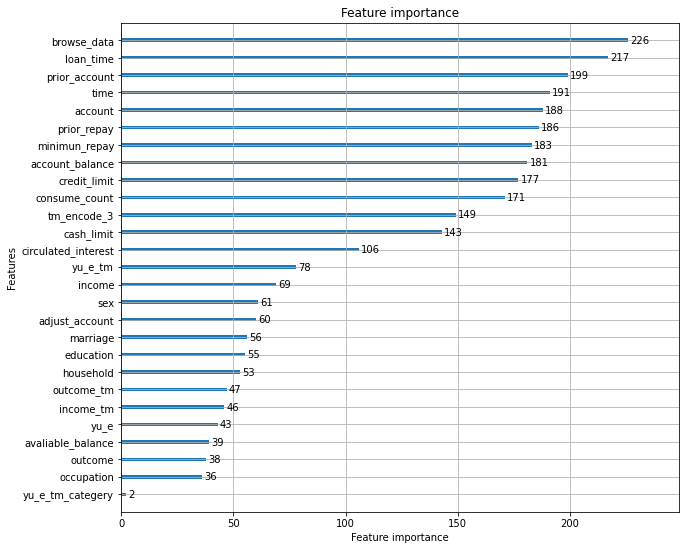

In [ ]:
from lightgbm import LGBMClassifier, plot_importance 

lgbm_model = LGBMClassifier()

lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)        

plot_importance(lgbm_model, figsize=(10, 9));

In [ ]:
#lightGBM model fit
import lightgbm as lgb
gbm = lgb.LGBMClassifier(verbose_eval = 10, metrics="rmse", n_estimators=10, max_depth=6, learning_rate=0.2)
gbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=20)
gbm.feature_importances_

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

[1]	training's rmse: 0.329365	valid_1's rmse: 0.333968
Training until validation scores don't improve for 20 rounds.
[2]	training's rmse: 0.326675	valid_1's rmse: 0.332006
[3]	training's rmse: 0.324732	valid_1's rmse: 0.330756
[4]	training's rmse: 0.323191	valid_1's rmse: 0.329843
[5]	training's rmse: 0.322039	valid_1's rmse: 0.329292
[6]	training's rmse: 0.320754	valid_1's rmse: 0.328741
[7]	training's rmse: 0.319767	valid_1's rmse: 0.328205
[8]	training's rmse: 0.318899	valid_1's rmse: 0.327894
[9]	training's rmse: 0.318168	valid_1's rmse: 0.327681
[10]	training's rmse: 0.317444	valid_1's rmse: 0.327471
Did not meet early stopping. Best iteration is:
[10]	training's rmse: 0.317444	valid_1's rmse: 0.327471


,cols,fea_imp
22,browse_data,31
23,loan_time,30
24,time,27
11,prior_repay,19
9,tm_encode_3,19
0,sex,17
10,prior_account,17
15,consume_count,17
14,minimun_repay,16
16,account,15


In [ ]:
feature_important = gbm.booster_.feature_importance(importance_type='split')

In [ ]:
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':feature_important})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
22,browse_data,31
23,loan_time,30
24,time,27
11,prior_repay,19
9,tm_encode_3,19
0,sex,17
10,prior_account,17
15,consume_count,17
14,minimun_repay,16
16,account,15


In [ ]:
final_data = df[[ 'label', 'browse_data', 'loan_time', 'time','prior_repay', 'tm_encode_3',
                 'sex', 'prior_account', 'consume_count', 'minimun_repay', 'account',
                 'yu_e_tm',  'credit_limit', 'circulated_interest', 'cash_limit',
                 'account_balance', 'household', 'education', 'adjust_account',
                 'outcome_tm', 'income'

]]
final_data

,label,browse_data,loan_time,time,prior_repay,tm_encode_3,sex,prior_account,consume_count,minimun_repay,...,yu_e_tm,credit_limit,circulated_interest,cash_limit,account_balance,household,education,adjust_account,outcome_tm,income
0,0,0.0,5914855887,5.914856e+09,0.000000,0.000000e+00,1,0.000000,0.000000,0.000000,...,-8.094010e+05,0.000000,0.000000,0.000000,0.000000,3,3,0.000000,5.900935e+09,13.734079
1,0,151500.0,5914855887,2.551708e+08,15.277706,5.659685e+09,1,15.684107,2.521739,13.109063,...,0.000000e+00,18.638974,0.000000,7.087560,19.872065,1,3,0.000000,0.000000e+00,0.000000
2,0,38586.0,5914855887,5.914856e+09,18.580174,0.000000e+00,1,18.366771,2.000000,16.045651,...,-1.132222e+09,18.361833,0.000000,0.000000,18.348271,4,4,0.000000,5.899778e+09,13.249264
3,1,38764.0,5914855887,2.443522e+06,4.948698,5.912412e+09,1,7.268065,0.055556,17.456999,...,-8.606264e+08,16.055204,0.000000,7.808445,18.847398,2,4,0.000000,5.902715e+09,12.128566
4,0,0.0,5914855887,5.914856e+09,18.539760,0.000000e+00,1,20.679226,0.000000,18.474369,...,0.000000e+00,20.664418,0.000000,19.971271,20.636046,1,2,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55591,0,46890.0,5932135887,-5.486400e+06,10.357137,5.937622e+09,1,7.468202,0.000000,18.003887,...,0.000000e+00,12.530589,6.001059,12.357302,20.104776,4,3,2.191276,0.000000e+00,0.000000
55592,1,19600.0,5932135887,2.417882e+07,7.060006,5.907957e+09,1,7.853140,0.000000,16.956516,...,0.000000e+00,13.590873,0.286304,7.284420,18.251186,4,2,0.000000,0.000000e+00,0.000000
55593,0,104040.0,5932135887,1.360766e+07,19.406607,5.918528e+09,1,19.650582,0.708333,17.220416,...,0.000000e+00,20.352278,0.000000,8.948062,19.522997,4,4,4.846773,0.000000e+00,0.000000
55594,0,70720.0,5932135887,1.705051e+09,6.761914,4.227085e+09,1,6.524374,0.285714,18.124119,...,0.000000e+00,9.462677,0.294457,9.277013,19.319294,4,3,1.078283,0.000000e+00,0.000000
